In [1]:
import pandas as pd
import lxml
import html5lib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",
                    decimal=',', thousands='.', encoding="utf-8",
                    attrs={"class": "wikitable collapsible collapsed"})
df = temp[3]

In [3]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
df.shape

(28, 9)

In [4]:
df = df.replace('—', np.NaN)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [6]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [7]:
df.fillna(0, inplace=False)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,0,0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [8]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [5]:
df = df.drop(27)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [10]:
avr_2019 = df["2019"].dropna().astype(float).mean()
print("Average in 2019:", avr_2019.round(2))
temp = df[["Регіон", "2019"]]
temp = temp.fillna(0)
temp[temp["2019"].astype(float)>avr_2019]


Average in 2019: 8.02


,Регіон,2019
2,Волинська,10.1
6,Закарпатська,10.4
8,Івано-Франківська,8.8
12,Львівська,8.7
14,Одеська,8.8
16,Рівненська,10.7
20,Херсонська,8.1
23,Чернівецька,9.2
25,Київ,11.0


In [11]:
temp = df[["Регіон", "2014"]]
temp[temp["2014"].astype(float)==temp["2014"].astype(float).max()]["Регіон"]

16    Рівненська
Name: Регіон, dtype: object

<Axes: xlabel='Регіон'>

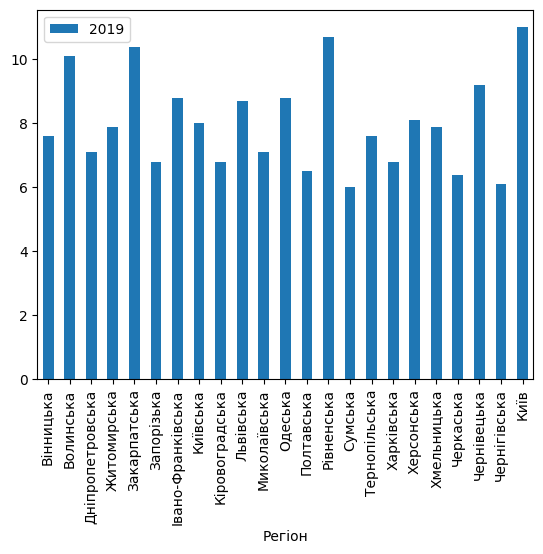

In [6]:
temp = df[["Регіон", "2019"]].dropna()
temp["2019"]=temp["2019"].astype(float)
temp.plot(kind="bar", x="Регіон")

<Axes: title={'center': 'Коефіціент народжуваності в м.Київ'}, xlabel='Рік'>

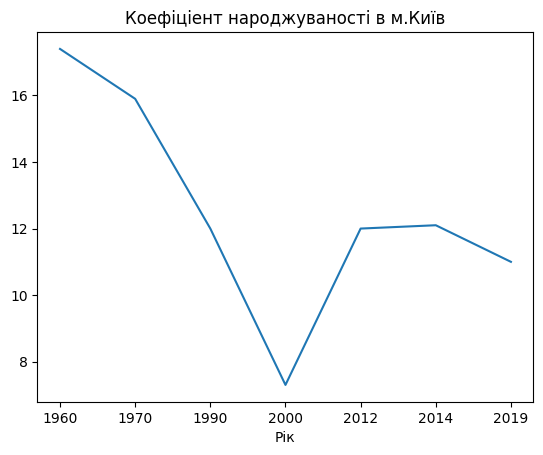

In [87]:
kyiv_data = df.loc[25].dropna()
head_data = kyiv_data[0]
kyiv_data = kyiv_data.drop(["Регіон"])
kyiv_data.astype(float).plot(xlabel="Рік", title="Коефіціент народжуваності в м.Київ")

C:\Users\Max\AppData\Local\Temp\ipykernel_7928\2818823651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data[["1990", "2014"]] = x_data[["1990", "2014"]].astype(float)


<Axes: xlabel='Регіон'>

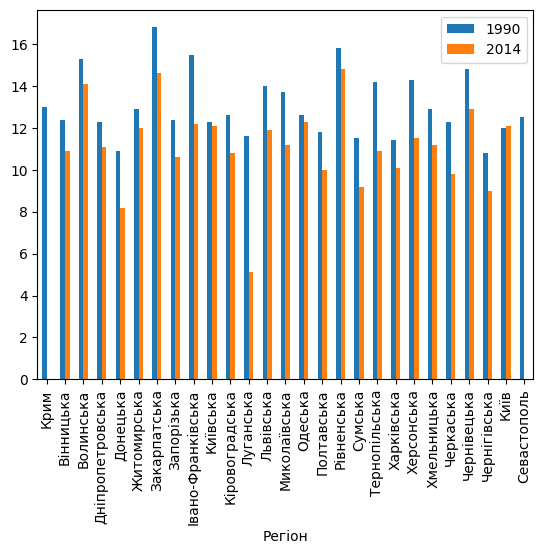

In [7]:
x_data = df[["Регіон", "1990", "2014"]]
x_data[["1990", "2014"]] = x_data[["1990", "2014"]].astype(float)
x_data.plot(kind="bar", x="Регіон")

<Axes: ylabel='Регіон'>

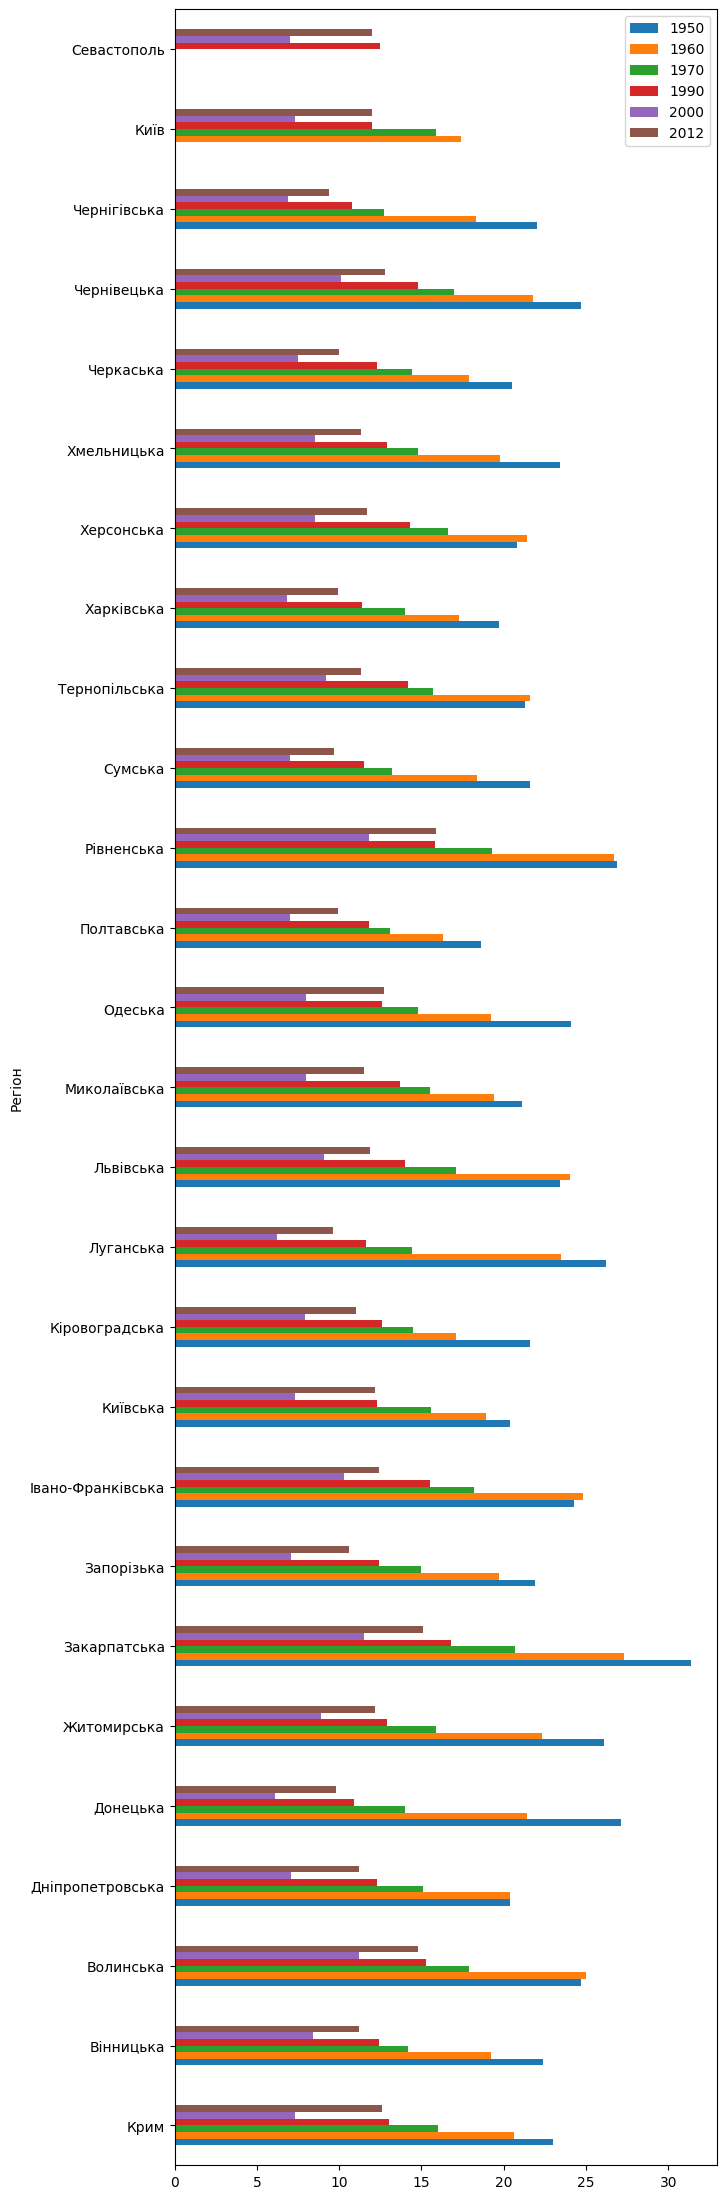

In [8]:
df.plot(kind="barh", x="Регіон", figsize=(7,28))